## Hough Transform


Is a popular techq. to detect any shape if can be representated in mathematical form. It can detect even if it is broken or distorted a little.

A line representation y = mx + c 
or polar cordination x.cosø + y.sinø = r

In Hough Transform we can represnt a line y = mx + c as point in hough space with (m-xaxis, c-yaxis). It changes the space in which line is represented to a point. 

It can be represented in m,c values. 

Also reversely, a point in xy plane can be representated as a line in hough space.

Similarly, polar coordinate can be representated as curve in hough space.

#### It is convenient to use Hough Transform in Polar cordinate.


### Steps to do Hough Transformation Algorithm:

1. Edge detection e.g Canny edge detection technique.
2. Mapping of edge points to hough space and store in accumulator.
3. Interpretation of accumulator to yeild lines of infinite length. Interpretation is done by thresholding and  possibly other constraints.
4. Conversion of infinite lines to finite lines

### OpenCV has two type:

1. Standard Hough Transform (Hough Lines Method)
2. Probabilistic Hough Line Transform (Hough Line P Method)

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [66]:
image = cv.imread('Suduko.png')

In [67]:
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

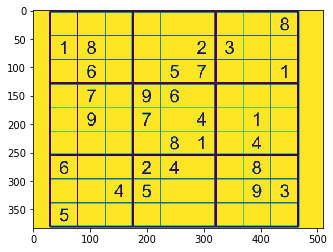

In [68]:
plt.imshow(img_gray)

## To detect all the lines in the puzzle

#### Step 1: apply canny edge detection

In [69]:
# using canny edge detection
#values:(imgsrc, threshold1, threshold2, aperturesize())

edges = cv.Canny(img_gray, 20, 150, apertureSize=3)

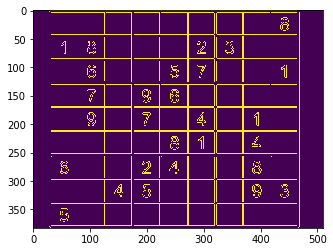

In [70]:
plt.imshow(edges)

In [71]:
cv.imshow('edges',edges)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

#### Step 2: hough lines and store in accumulator

In [72]:
#apply HoughLines Method (normal method)
#values(imgsrc, rho - 1(distance resolution of accumulator in px., theta =pi/180 (angle resolution in radian), 
#       threshold(is accumulator threshold, only those lines return who get enogh votes) >threshold)

#output vector in lines, so these lines will be in polar coordinate, with rho, theta and votes

lines = cv.HoughLines(edges, 1, np.pi/180, 200)

In [93]:
lines[5]

array([[43.       ,  1.5707964]], dtype=float32)

#### Step 3 Interpretation of accumulator, we convert ot polar coordinate to cartesian plane

In [96]:
#we use line vector, we iterate over all the line vector


for line in lines:
    
    #rho is distance from coordinate (0,0) which is top left corner of image
    #theta is the line rotation angle in radian.
    rho, theta = line[0] #line has values rho, theta and votes, we interested in first 2 values
    
    #we want to convert polar cordinate to normal cartesian coordinate for line method as it take two point o draw.
    a = np.cos(theta) #we find cos value
    
    b = np.sin(theta) #find sin value
    
    #x0 and y0 will give the origin points or top left corner of image
    x0 = a * rho #contain r*cos(ø)
    
    y0 = b * rho #contain r*sin(ø)
    
    #x1 stores the rounded value of (r*cos(ø) - 1000 * sin(ø))
    x1 = int((x0 + (1000 * (-b))))
    
    #y1 stores the rounded value of (r*sin(ø) + 1000 * cos(ø))
    y1 = int((y0 + (1000 * (a))))
    
    #x2 stores the rounded value of (r*cos(ø) + 1000 * sin(ø))
    x2 = int((x0 - (1000 * (-b))))
    
    #y2 stores the rounded value of (r*sin(ø) - 1000 * cos(ø))
    y2 = int((y0 - (1000 * (a))))
    

#### Step 4: Put it back all together to orignal image to display lines

In [97]:
#draw line on original image,
#vales:(image, pt1, pt2, color, thickness)

image = cv.line(image, (x1, y1), (x2, y2), (0,255,0), 2)

In [98]:
#plt.imshow(edges)

cv.imshow('hough_lines',image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

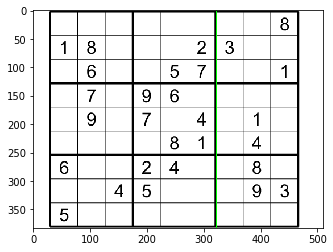

In [77]:
#Display image

plt.imshow(image)

##### The lines are infinte range even after provinf with two points. Plus the computation is high. So we will try the other method

## Using Probabilitic Hough Transformation

this is optimization of the normal hough transform

In [124]:
image = cv.imread('Suduko2.jpg')

In [125]:
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

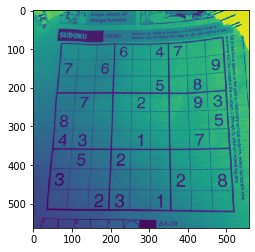

In [126]:
plt.imshow(img_gray)

In [127]:
edges = cv.Canny(img_gray, 20, 150, apertureSize=3)

### Using Prob. Hough Transform

It doesnt take all the lines, only random subset of lines sufficient for line detection.

values:(image, rho, theta in radian, threshold is accumulator parameter(only those lines selected whic is grater than threshold value), minLineLength-line shorter than this length will be reject, maxLineGap - maximum allowed line gap between two line segment to treat as single line)

This return output vector of lines, but difference from HoughLine is line at index[0] will give x1,y1,x2,y2 to define the points.


In [133]:

lines = cv.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

In [134]:
# iterate over the lines:

for line in lines:
    
    #HoughtLineP directly gives the x,y values points to draw the line
    x1, y1, x2, y2 = line[0] 
    
    #draw lines will all provided point
    cv.line(image, (x1,y1), (x2,y2), (0,255,0), 2)


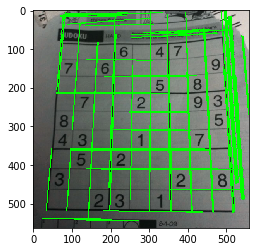

In [135]:
#view image using Matplot

plt.imshow(image)

In [136]:
#using cv

cv.imshow('hough_lines',image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1